In [2]:
#repayment status(PAY_X)
#social status(SEX, EDUCATION, MARRIAGE)
#...


In [37]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from scipy.stats import iqr

In [38]:
#Reading file
cwd=os.getcwd()
filename=cwd+ '/default of credit card clients.xls'
nanDict = {}
df = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)


In [39]:
df.rename(index=str, columns={"default payment next month": "defPayNextMonth","PAY_0":"PAY_1"}, inplace=True)
print(df.keys())
print(df.isnull().sum().sum()) #no missing values

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defPayNextMonth'],
      dtype='object')
0


In [29]:
#print(df.info())
#DEFINE CATEGORICAL VARIABLES
#CHECK VALUES TO MAKE SURE THERE ARE APPROPRIATE
cat=["SEX","EDUCATION","MARRIAGE", "PAY_1","PAY_2","PAY_3","PAY_4","PAY_5","PAY_6"]
for i in (cat):
    values_counts=df[i].value_counts()
    print("These are the observed values for " + str(i) + ":")
    print(values_counts)

These are the observed values for SEX:
2    17855
1    11746
Name: SEX, dtype: int64
These are the observed values for EDUCATION:
2    14024
1    10581
3     4873
4      123
Name: EDUCATION, dtype: int64
These are the observed values for MARRIAGE:
2    15806
1    13477
3      318
Name: MARRIAGE, dtype: int64
These are the observed values for PAY_1:
 0    14499
-1     5633
 1     3662
-2     2708
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
These are the observed values for PAY_2:
 0    15476
-1     5990
 2     3904
-2     3722
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
These are the observed values for PAY_3:
 0    15518
-1     5863
-2     4027
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
These are the observed values for PAY_4:
 0    16204
-1     5617
-2     4287
 2     3142
 3  

In [41]:
sex = [1,2]
education = [1,2,3,4]
marriage = [1,2,3]
payment = [0,1]
df = df[df["SEX"].isin(sex)]
df = df[df['EDUCATION'].isin(education)]
df = df[df['MARRIAGE'].isin(marriage)]
df = df[df['defPayNextMonth'].isin(payment)]
#We observe undocumented values for repayment status variables: -2 and 0.
#PAY-->4030 remaining observations-->too many 0 and -2
len(df) #29601 remaining observations
print(df)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
5          50000    1          2         1   57     -1      0     -1      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29996     220000    1          3         1   39      0      0      0      0   
29997     150000    1          3         2   43     -1     -1     -1     -1   
29998      30000    1          2         2   37      4      3      2     -1   
29999      80000    1          3         1   41      1     -1      0      0   
30000      50000    1          2         1   46     

In [8]:
# when pay=-2-->0
def adjust_pay(pay_vars):
    for i in pay_vars:
        fil = (df[i] == -2) | (df[i] == 0)
        df.loc[fil,i] = 0
        print("These are the new observed values for " + str(i) + ":")
        print(df[i].value_counts())
pay_variables= df[['PAY_1','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
new_pay_variables=adjust_pay(pay_variables)



These are the new observed values for PAY_1:
 0    17207
-1     5633
 1     3662
 2     2640
 3      320
 4       76
 5       24
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64
These are the new observed values for PAY_2:
 0    19198
-1     5990
 2     3904
 3      326
 4       97
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64
These are the new observed values for PAY_3:
 0    19545
-1     5863
 2     3802
 3      237
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64
These are the new observed values for PAY_4:
 0    20491
-1     5617
 2     3142
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64
These are the new observed values for PAY_5:
 0    21163
-1     5480
 2     2617
 3      177
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64
These are the new observed values for PAY_6:
 0    20859


In [11]:
import pandas as pd
from scipy import stats
for i in ["SEX","EDUCATION","MARRIAGE"]:
    crosstab=pd.crosstab(df['defPayNextMonth'], df[i])
    print("The p-value for the variable "+str(i)+" is "+" :")
    print(stats.chi2_contingency(crosstab)[1])
    
    #observation<5-->ikke bra, jeg kan ikke bruke Chiquadro
    

The p-value for the variable SEX is  :
8.151208643603006e-12
The p-value for the variable EDUCATION is  :
1.4541546992112855e-25
The p-value for the variable MARRIAGE is  :
1.1275572729868997e-07


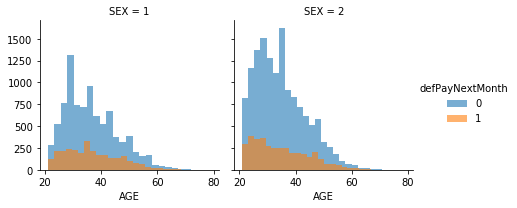

In [12]:
#random plot(example)
g = sns.FacetGrid(df, col='SEX', hue='defPayNextMonth')
g.map(plt.hist, 'AGE', alpha=0.6, bins=25) #alpha is for opacity
g.add_legend()


In [15]:
#Continuos variables
cont=['LIMIT_BAL','AGE','BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
df[cont].describe().transpose()
#big differences between 3rd percentiles and maxs-->outliers(??)
#plt.scatter(df)

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29601.0,167550.544914,129944.020953,10000.0,50000.0,140000.0,240000.0,1000000.0
AGE,29601.0,35.464072,9.213243,21.0,28.0,34.0,41.0,79.0
BILL_AMT1,29601.0,50957.432012,73370.242404,-165580.0,3528.0,22259.0,66623.0,964511.0
BILL_AMT2,29601.0,48942.189554,70923.985151,-69777.0,2970.0,21050.0,63497.0,983931.0
BILL_AMT3,29601.0,46803.203270,69123.892106,-157264.0,2652.0,20035.0,59830.0,1664089.0
BILL_AMT4,29601.0,43122.554204,64196.383913,-170000.0,2329.0,19005.0,54271.0,891586.0
BILL_AMT5,29601.0,40235.545184,60699.344884,-81334.0,1780.0,18091.0,50072.0,927171.0
BILL_AMT6,29601.0,38858.449816,59519.893043,-339603.0,1278.0,17118.0,49121.0,961664.0
PAY_AMT1,29601.0,5649.560319,16568.264941,0.0,1000.0,2100.0,5005.0,873552.0
PAY_AMT2,29601.0,5894.788386,23089.193621,0.0,825.0,2007.0,5000.0,1684259.0


In [16]:
new_df = df
def find_outliers(data,variable,numb):
    sorted(variable)
    outliers=[]
    non_outliers=[]
    q1,q3=np.percentile(variable,[25,75])
    iqr=q3-q1
    low_bound=q1-(numb*iqr)
    upper_bound=q3+(numb*iqr)
    #print(q1,q3,iqr,low_bound,upper_bound)
    for i in variable:
        if i>upper_bound or i<low_bound:
            outliers.append(i)
        else:
            non_outliers.append(i)
    data=data[variable.isin(non_outliers)]
    return data
    
for i in cont:
    outliers_datapoints=find_outliers(new_df,new_df[i],3)
    new_df = outliers_datapoints
    print(len(new_df))
print(new_df[cont].describe().transpose()) 
new_df.keys()
#with 1.5 we have a lot of outliers, too low for our purposes. We suggest using
#instead of 1.5, 3.

29600
29600
28816
28517
28228
28009
27780
27571
26202
25088
23995
23132
22396
21708
             count           mean            std      min       25%       50%  \
LIMIT_BAL  21708.0  138714.114612  112404.007007  10000.0  50000.00  110000.0   
AGE        21708.0      35.279759       9.428801     21.0     28.00      34.0   
BILL_AMT1  21708.0   37249.775106   44382.364963 -11545.0   2741.00   19767.5   
BILL_AMT2  21708.0   35110.322416   42156.885925 -18618.0   2168.75   18785.0   
BILL_AMT3  21708.0   32800.083425   39858.108440 -46127.0   1659.75   17992.0   
BILL_AMT4  21708.0   29752.189469   36979.239200 -50616.0   1223.50   16643.0   
BILL_AMT5  21708.0   27431.838769   35061.361583 -53007.0    913.00   14686.5   
BILL_AMT6  21708.0   26303.052607   34511.644103 -94625.0    650.00   12473.5   
PAY_AMT1   21708.0    2499.212364    2574.754800      0.0    416.00    1945.0   
PAY_AMT2   21708.0    2336.034642    2416.846365      0.0    390.00    1757.0   
PAY_AMT3   21708.0    196

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'defPayNextMonth'],
      dtype='object')

In [33]:
# Features and target 
data_x= new_df.loc[:, df.columns != 'defPayNextMonth']
target= new_df.loc[:, df.columns == 'defPayNextMonth']
print(data_x)
print(target)



       LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_1  PAY_2  PAY_3  PAY_4  \
ID                                                                            
1          20000    2          2         1   24      2      2     -1     -1   
2         120000    2          2         2   26     -1      2      0      0   
3          90000    2          2         2   34      0      0      0      0   
4          50000    2          2         1   37      0      0      0      0   
6          50000    1          1         2   37      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29992     210000    1          2         1   34      3      2      2      2   
29993      10000    1          3         1   43      0      0      0     -2   
29995      80000    1          2         2   34      2      2      2      2   
29997     150000    1          3         2   43     -1     -1     -1     -1   
30000      50000    1          2         1   46     

In [34]:
data_x_with_dummies = pd.get_dummies(data_x,columns=cat)
print(data_x_with_dummies.shape)

(21708, 86)


In [36]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
scaler.fit(data_x_with_dummies[cont])
scaled_data = scaler.transform(data_x_with_dummies[cont])


#stan_new_df=preprocessing.scale(new_df)
#print(stan_new_df)
#stan_new_df= pd.DataFrame(stan_new_df,columns=df.keys())
#summary=stan_new_df[cont].describe()
#summary.round(decimals=3)

print(scaled_data.shape)

#mean=0 and std=1 for each variable--> fantastisk

(21708, 14)


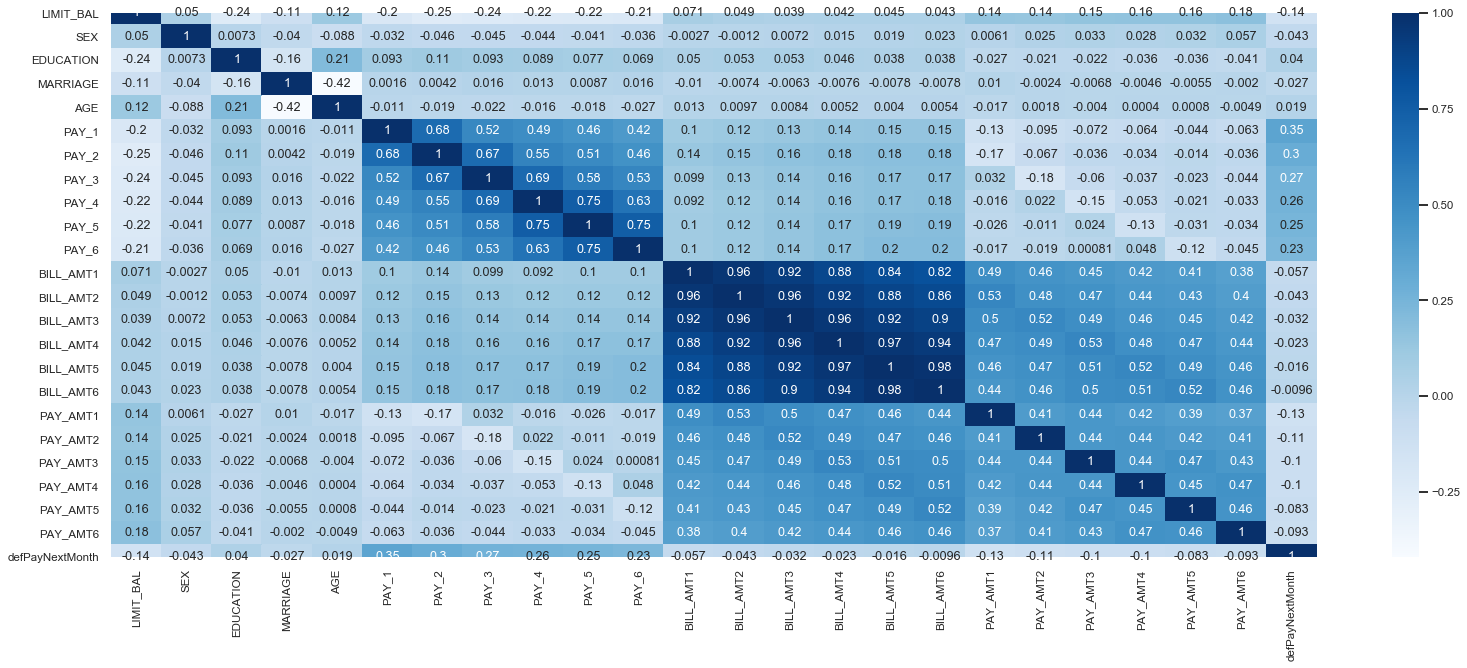

In [17]:
#Correlation matrix (continuous/discrete data)
sns.set(rc={'figure.figsize':(27,10)})
sns.set_context("talk", font_scale=0.7)
sns.heatmap(stan_new_df.iloc[:,:].corr(), cmap='Blues', annot=True)

In [48]:
#CATEGORICAL VARIABLES--> X2 test
#import pandas as pd
#import scipy.stats as scs
#skal vi bruker det? Jeg synes ikke.


def categories(series):
    return range(int(series.min()), int(series.max()) + 1)


def chi_square_of_df_cols(df, col1, col2):
    df_col1, df_col2 = df[col1], df[col2]

    result = [[sum((df_col1 == cat1) & (df_col2 == cat2))
               for cat2 in categories(df_col2)]
              for cat1 in categories(df_col1)]

    return scs.chi2_contingency(result)
print(chi_square_of_df_cols(new_df, target,cat))

KeyError: "None of [Index([(), (), (), (), (), (), (), (), (), (),\n       ...\n       (), (), (), (), (), (), (), (), (), ()],\n      dtype='object', length=21708)] are in the [columns]"